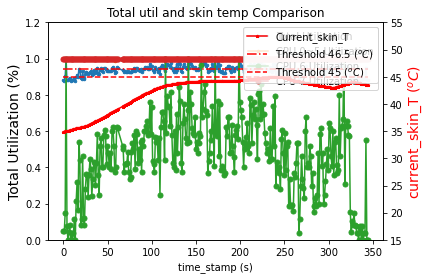

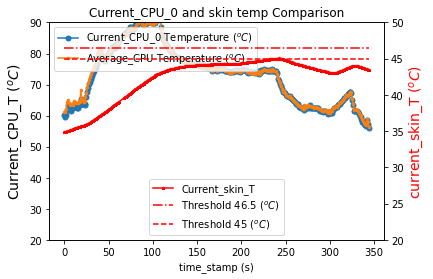

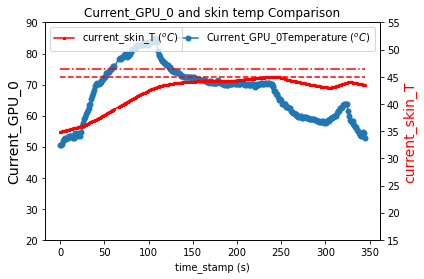

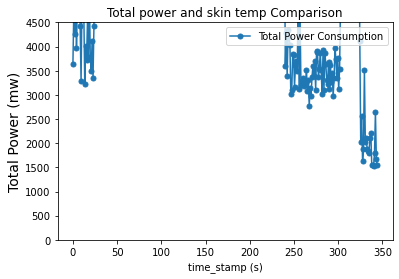

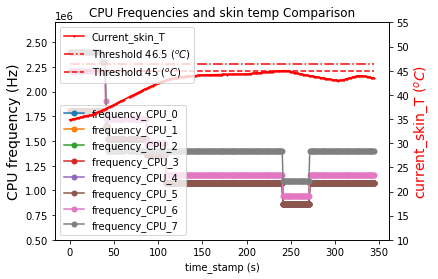

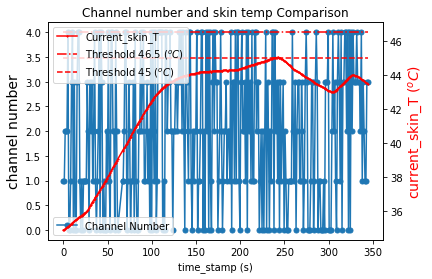

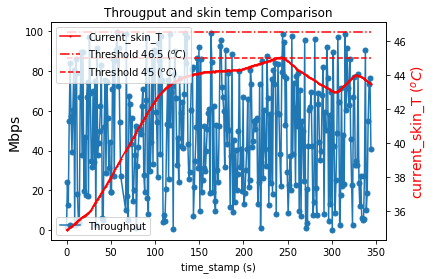

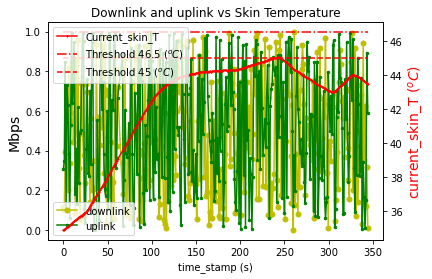

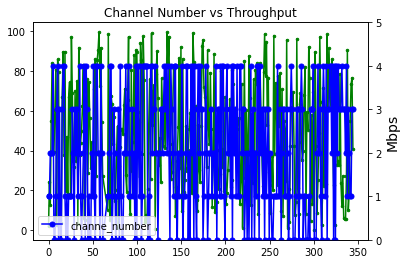

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from statsmodels.nonparametric.smoothers_lowess import lowess


def read_json(filepath, encoding='utf-8'):
    """
    Parameters:
        filepath (str): path to file
        encoding (str): name of encoding used to decode the file

    Returns:
        dict/list: dict or list representations of the decoded JSON document
    """

    with open(filepath, 'r', encoding=encoding) as file_obj:
        return json.load(file_obj)

original_data = read_json('./json_data.json')
# prfloat(x)
current_skin_T = []
current_CPU_0_usage = []
current_CPU_1_usage = []
current_CPU_2_usage = []
current_CPU_3_usage = []
current_CPU_4_usage = []
current_CPU_5_usage = []
current_CPU_6_usage = []
current_CPU_7_usage = []
current_CPU_0 = []
current_CPU_1 = []
current_CPU_2 = []
current_CPU_3 = []
current_CPU_4 = []
current_CPU_5 = []
current_CPU_6 = []
current_CPU_7 = []
current_CPU_8 = []
current_CPU_9 = []
current_GPU_0 = []
current_GPU_1 = []
battert_viltage = []
battert_current = []
frequency_CPU_0 = []
frequency_CPU_1 = []
frequency_CPU_2 = []
frequency_CPU_3 = []
frequency_CPU_4 = []
frequency_CPU_5 = []
frequency_CPU_6 = []
frequency_CPU_7 = []
Total_utilization = []
time_stamp = []
CPU0_state_entries_1 = []
CPU0_state_entries_2 = []
CPU0_state_entries_3 = []
CPU1_state_entries_1 = []
CPU1_state_entries_2 = []
CPU1_state_entries_3 = []

for key, value in original_data.items():
    time_stamp.append(int(key))
    current_skin_T.append(float(value[0]))
    Total_utilization.append(float(value[1]))
    current_CPU_0_usage.append(float(value[2]))
    current_CPU_1_usage.append(float(value[3]))
    current_CPU_2_usage.append(float(value[4]))
    current_CPU_3_usage.append(float(value[5]))
    current_CPU_4_usage.append(float(value[6]))
    current_CPU_5_usage.append(float(value[7]))
    current_CPU_6_usage.append(float(value[8]))
    current_CPU_7_usage.append(float(value[9]))
    current_CPU_0.append(float(value[10]))
    current_CPU_1.append(float(value[11]))
    current_CPU_2.append(float(value[12]))
    current_CPU_3.append(float(value[13]))
    current_CPU_4.append(float(value[14]))
    current_CPU_5.append(float(value[15]))
    current_CPU_6.append(float(value[16]))
    current_CPU_7.append(float(value[17]))
    current_CPU_8.append(float(value[18]))
    current_CPU_9.append(float(value[19]))
    current_GPU_0.append(float(value[20]))
    current_GPU_1.append(float(value[21]))
    battert_viltage.append(float(value[22]))
    battert_current.append(float(value[23]))
    frequency_CPU_0.append(float(value[24]))
    frequency_CPU_1.append(float(value[25]))
    frequency_CPU_2.append(float(value[26]))
    frequency_CPU_3.append(float(value[27]))
    frequency_CPU_4.append(float(value[28]))
    frequency_CPU_5.append(float(value[29]))
    frequency_CPU_6.append(float(value[30]))
    frequency_CPU_7.append(float(value[31]))



    CPU0_state_entries_1.append(float(value[32]))
    CPU0_state_entries_2.append(float(value[33]))
    CPU0_state_entries_3.append(float(value[34]))
    CPU1_state_entries_1.append(float(value[35]))
    CPU1_state_entries_2.append(float(value[36]))
    CPU1_state_entries_3.append(float(value[37]))



voltage = np.array(battert_viltage)
current = np.array(battert_current)
power = -voltage * current / 1e9

CPU_0_5_average_U = (np.array(current_CPU_0_usage) + np.array(current_CPU_1_usage) + np.array(current_CPU_2_usage) +\
            np.array(current_CPU_3_usage) + np.array(current_CPU_4_usage) + np.array(current_CPU_5_usage))/6


current_CPU_0_T = np.array(current_CPU_0)
current_CPU_1_T = np.array(current_CPU_1)
current_CPU_2_T = np.array(current_CPU_2)
current_CPU_3_T = np.array(current_CPU_3)
current_CPU_4_T = np.array(current_CPU_4)
current_CPU_5_T = np.array(current_CPU_5)
current_CPU_6_T = np.array(current_CPU_6)
current_CPU_7_T = np.array(current_CPU_7)
current_CPU_8_T = np.array(current_CPU_8)
current_CPU_9_T = np.array(current_CPU_8)

average_CPU_T = (current_CPU_0_T + current_CPU_1_T + current_CPU_2_T + current_CPU_3_T + \
                    current_CPU_4_T + current_CPU_5_T + current_CPU_6_T + current_CPU_7_T)/8

T_const = np.ones((average_CPU_T.shape[0],))*46.5
T_const2 = np.ones((average_CPU_T.shape[0],))*45

time_stamp = np.array(time_stamp)
time_stamp = time_stamp.astype(int)

time_stamp = (time_stamp - time_stamp[0])/1000




# plt.figure(0)
fig,ax=plt.subplots()
ax.plot(time_stamp, Total_utilization, marker=".", markersize=5)
ax.plot(time_stamp, CPU_0_5_average_U , marker=".", markersize=5)
ax.plot(time_stamp, current_CPU_6_usage, marker="o", markersize=5)
ax.plot(time_stamp, current_CPU_7_usage, marker="o", markersize=5)

ax.set_xlabel("time_stamp (s)")
plt.ylim(0, 1.2)
plt.legend(['Total Utilization','CPU 0~5 Utilization', 'CPU 6 Utilization', 'CPU 7 Utilization'], loc=1)
ax.set_ylabel("Total Utilization (%)", fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(time_stamp, current_skin_T ,color="r",marker="*", markersize=3)
ax2.set_ylabel("current_skin_T ($^o C$)",color="red", fontsize=14)
ax2.plot(time_stamp, T_const ,color="r",linestyle='-.', linewidth=1.5)
ax2.plot(time_stamp, T_const2 ,color="r",linestyle='--', linewidth=1.5)
plt.ylim(15, 55)
plt.title("Total util and skin temp Comparison")
plt.legend(['Current_skin_T','Threshold 46.5 ($^o C$)', 'Threshold 45 ($^o C$)'], loc=1)

# plt.figure(1)
fig,ax=plt.subplots()
ax.plot(time_stamp, current_CPU_0, marker="o", markersize=5)
ax.plot(time_stamp, average_CPU_T, marker=".", markersize=5)
plt.ylim(20, 90)
ax.set_xlabel("time_stamp (s)")
plt.legend(['Current_CPU_0 Temperature ($^o C$)',"Average_CPU Temperature ($^o C$)"], loc=2)
ax.set_ylabel("Current_CPU_T ($^o C$)",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(time_stamp, current_skin_T ,color="r",marker="*",  markersize=3)
ax2.plot(time_stamp, T_const ,color="r",linestyle='-.', linewidth=1.5)
ax2.plot(time_stamp, T_const2 ,color="r",linestyle='--', linewidth=1.5)
ax2.set_ylabel("current_skin_T ($^o C$)",color="red", fontsize=14)
plt.ylim(20, 50)
plt.title("Current_CPU_0 and skin temp Comparison")
plt.legend(['Current_skin_T','Threshold 46.5 ($^o C$)', 'Threshold 45 ($^o C$)'], loc=8)


# plt.figure(2)
fig,ax=plt.subplots()
ax.plot(time_stamp, current_GPU_0, marker="o",  markersize=5)
ax.set_xlabel("time_stamp (s)")
plt.ylim(20, 90)
plt.legend(['Current_GPU_0Temperature ($^o C$)',], loc=1)
ax.set_ylabel("Current_GPU_0",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(time_stamp, current_skin_T ,color="r",marker="*", markersize=3)
ax2.plot(time_stamp, T_const ,color="r",linestyle='-.', linewidth=1.5)
ax2.plot(time_stamp, T_const2 ,color="r",linestyle='--', linewidth=1.5)
ax2.set_ylabel("current_skin_T",color="red",fontsize=14)
plt.title("Current_GPU_0 and skin temp Comparison")
plt.legend(['current_skin_T ($^o C$)'], loc=2)
plt.ylim(15, 55)

# plt.figure(3)
fig,ax=plt.subplots()
ax.plot(time_stamp, power, marker="o", markersize=5)
ax.set_xlabel("time_stamp (s)")
ax.set_ylabel("Total Power (mw)",fontsize=14)
plt.ylim(0, 4500)
plt.legend(['Total Power Consumption'], loc=1)
# ax2=ax.twinx()
# # make a plot with different y-axis using second axis object
# ax2.plot(time_stamp, current_skin_T ,color="r",marker="*", markersize=3)
# ax2.plot(time_stamp, average_CPU_T, color="r",linestyle='-', markersize=3)
# ax2.plot(time_stamp, T_const ,color="r",linestyle='-.', linewidth=1.5)
# ax2.plot(time_stamp, T_const2 ,color="r",linestyle='--', linewidth=1.5)
# ax2.set_ylabel("current_skin_T ($^o C$)",color="red",fontsize=14)
# plt.ylim(10, 50)
plt.title("Total power and skin temp Comparison")
# plt.legend(['Current_skin_T','Average_CPU_T','Threshold 46.5 ($^o C$)', 'Threshold 45 ($^o C$)'], loc=4)

fig,ax=plt.subplots()

ax.plot(time_stamp, frequency_CPU_0, marker="o", markersize=5)
ax.plot(time_stamp, frequency_CPU_1, marker="o", markersize=5)
ax.plot(time_stamp, frequency_CPU_2, marker="o", markersize=5)
ax.plot(time_stamp, frequency_CPU_3, marker="o", markersize=5)
ax.plot(time_stamp, frequency_CPU_4, marker="o", markersize=5)
ax.plot(time_stamp, frequency_CPU_5, marker="o", markersize=5)
ax.plot(time_stamp, frequency_CPU_6, marker="o", markersize=5)
ax.plot(time_stamp, frequency_CPU_7, marker="o", markersize=5)
ax.set_xlabel("time_stamp (s)")
plt.legend(['frequency_CPU_0','frequency_CPU_1', 'frequency_CPU_2', 'frequency_CPU_3 ', 'frequency_CPU_4', 'frequency_CPU_5', 'frequency_CPU_6', 'frequency_CPU_7'], loc=3)
ax.set_ylabel("CPU frequency (Hz)",fontsize=14)
plt.ylim(0.5e6, 2.7e6)

ax2=ax.twinx()
ax2.plot(time_stamp, current_skin_T ,color="r",marker="*", markersize=1.5)
ax2.plot(time_stamp, T_const ,color="r",linestyle='-.', linewidth=1.5)
ax2.plot(time_stamp, T_const2 ,color="r",linestyle='--', linewidth=1.5)
ax2.set_ylabel("current_skin_T ($^o C$)",color="red",fontsize=14)
plt.title("CPU Frequencies and skin temp Comparison")
plt.legend(['Current_skin_T','Threshold 46.5 ($^o C$)', 'Threshold 45 ($^o C$)'], loc=2)
plt.ylim(10, 55)



channe_number = np.random.randint(5, size=(time_stamp.shape[0],))

fig,ax=plt.subplots()

ax.plot(time_stamp, channe_number, marker="o", markersize=5)
ax.set_xlabel("time_stamp (s)")
plt.legend(['Channel Number'], loc=3)
ax.set_ylabel("channel number",fontsize=14)
# plt.ylim(0.5e6, 2.7e6)

ax2=ax.twinx()
ax2.plot(time_stamp, current_skin_T ,color="r",marker="*", markersize=1.5)
ax2.plot(time_stamp, T_const ,color="r",linestyle='-.', linewidth=1.5)
ax2.plot(time_stamp, T_const2 ,color="r",linestyle='--', linewidth=1.5)
ax2.set_ylabel("current_skin_T ($^o C$)",color="red",fontsize=14)
plt.title("Channel number and skin temp Comparison")
plt.legend(['Current_skin_T','Threshold 46.5 ($^o C$)', 'Threshold 45 ($^o C$)'], loc=2)

# plt.ylim(10, 55)



througput = np.random.rand(time_stamp.shape[0],)*100

fig,ax=plt.subplots()

ax.plot(time_stamp, througput, marker="o", markersize=5)
ax.set_xlabel("time_stamp (s)")
plt.legend(['Throughput'], loc=3)
ax.set_ylabel("Mbps",fontsize=14)
# plt.ylim(0.5e6, 2.7e6)

ax2=ax.twinx()
ax2.plot(time_stamp, current_skin_T ,color="r",marker="*", markersize=1.5)
ax2.plot(time_stamp, T_const ,color="r",linestyle='-.', linewidth=1.5)
ax2.plot(time_stamp, T_const2 ,color="r",linestyle='--', linewidth=1.5)
ax2.set_ylabel("current_skin_T ($^o C$)",color="red",fontsize=14)
plt.title("Througput and skin temp Comparison")
plt.legend(['Current_skin_T','Threshold 46.5 ($^o C$)', 'Threshold 45 ($^o C$)'], loc=2)


downlink = np.random.rand(time_stamp.shape[0],)
uplink = np.random.rand(time_stamp.shape[0],)

fig,ax=plt.subplots()

ax.plot(time_stamp, downlink, color="y", marker="o", markersize=5)
ax.plot(time_stamp, uplink, color="g", marker=".", markersize=5)
ax.set_xlabel("time_stamp (s)")
plt.legend(['downlink','uplink'], loc=3)
ax.set_ylabel("Mbps",fontsize=14)
# plt.ylim(0.5e6, 2.7e6)

ax2=ax.twinx()
ax2.plot(time_stamp, current_skin_T ,color="r",marker="*", markersize=1.5)
ax2.plot(time_stamp, T_const ,color="r",linestyle='-.', linewidth=1.5)
ax2.plot(time_stamp, T_const2 ,color="r",linestyle='--', linewidth=1.5)
ax2.set_ylabel("current_skin_T ($^o C$)",color="red",fontsize=14)
plt.title("Downlink and uplink vs Skin Temperature")
plt.legend(['Current_skin_T','Threshold 46.5 ($^o C$)', 'Threshold 45 ($^o C$)'], loc=2)




fig,ax=plt.subplots()

ax2=ax.twinx()
ax.plot(time_stamp, througput, color="g", marker=".", markersize=5)
plt.title("Channel Number vs Throughput")
plt.legend(['throughput'], loc=2)
plt.ylim(0, 100)

ax2.plot(time_stamp, channe_number, color="b", marker="o", markersize=5)
ax2.set_xlabel("time_stamp (s)")
plt.legend(['channe_number','uplink'], loc=3)
ax2.set_ylabel("Mbps",fontsize=14)
plt.ylim(0, 5)


plt.show()







46857306
[88900]
(304300,)
(304300,)


Text(0, 0.5, 'channel number')

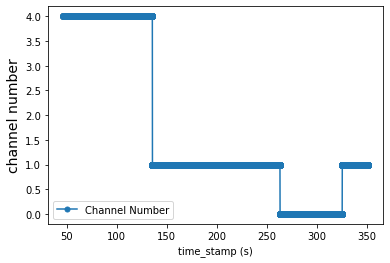

In [45]:
time_stamp_start = 1657231007306

time_stamp_nsg_start = 1657230955.7 * 1000
time_stamp_nsg_stop = 1657184454.3 *1000

deviation = time_stamp_start - time_stamp_nsg_start
print(deviation)
time_stamp_point1 = 1657184238.9 *1000+deviation
time_stamp_point2 = 1657184366.5 *1000+deviation
time_stamp_point3 = 1657184428.7 *1000 +deviation

time_stamp_nsg = np.arange(time_stamp_nsg_start,time_stamp_nsg_stop) + deviation


point1 = np.where(time_stamp_nsg == time_stamp_point1)
point2 = np.where(time_stamp_nsg == time_stamp_point2)
point3 = np.where(time_stamp_nsg == time_stamp_point3)
time_stamp_nsg = (time_stamp_nsg)/1000

print(point1[0])


channe_number = np.ones((time_stamp_nsg.shape[0],))*4
print(channe_number.shape)
print(time_stamp_nsg.shape)
# channe_number[0:point1[0].item()] = channe_number[0,point1[0].item()]
channe_number[point1[0].item():point2[0].item()] = channe_number[point1[0].item():point2[0].item()]/4
channe_number[point2[0].item():point3[0].item()] = channe_number[point2[0].item():point3[0].item()]*0
channe_number[point3[0].item():] = channe_number[point3[0].item():]/4

fig,ax=plt.subplots()
time_stamp_nsg = (time_stamp_nsg - time_stamp_nsg[0]) + deviation/1000000
ax.plot(time_stamp_nsg, channe_number, marker="o", markersize=5)
ax.set_xlabel("time_stamp (s)")
plt.legend(['Channel Number'], loc=3)
ax.set_ylabel("channel number",fontsize=14)
# plt.ylim(0.5e6, 2.7e6)

# ax2=ax.twinx()
# ax2.plot(time_stamp_nsg, current_skin_T ,color="r",marker="*", markersize=1.5)
# ax2.plot(time_stamp_nsg, T_const ,color="r",linestyle='-.', linewidth=1.5)
# ax2.plot(time_stamp_nsg, T_const2 ,color="r",linestyle='--', linewidth=1.5)
# ax2.set_ylabel("current_skin_T ($^o C$)",color="red",fontsize=14)
# plt.title("Channel number and skin temp Comparison")
# plt.legend(['Current_skin_T','Threshold 46.5 ($^o C$)', 'Threshold 45 ($^o C$)'], loc=2)

In [25]:
1657230925231/1000 - 1657184150

46775.230999946594

30469
1657231038900
1657231166500
[1657230955700 1657230955701 1657230955702 ... 1657231254297 1657231254298
 1657231254299]
[210800]
(298600,)
(298600,)


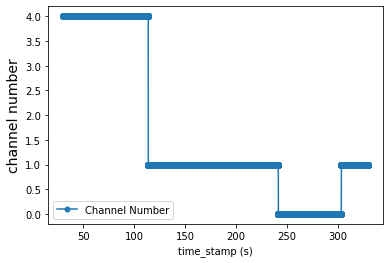

In [61]:
time_stamp_start = 1657230925231

time_stamp_nsg_start = int(1657230955.7 * 1000)
time_stamp_nsg_stop = int(1657231254.3 *1000)

deviation =  time_stamp_nsg_start-time_stamp_start
print(deviation)
time_stamp_point1 = 1657231038.9 *1000 
time_stamp_point2 = 1657231166.5 *1000
time_stamp_point3 = 1657231228.3 *1000


time_stamp_point1 = int(time_stamp_point1)
time_stamp_point2 = int(time_stamp_point2)
time_stamp_point3 = int(time_stamp_point3)

time_stamp_nsg = np.arange(time_stamp_nsg_start,time_stamp_nsg_stop)

print(time_stamp_point1)
print(time_stamp_point2)
print(time_stamp_nsg)

point1 = np.where(time_stamp_nsg == time_stamp_point1)
point2 = np.where(time_stamp_nsg == time_stamp_point2)
point3 = np.where(time_stamp_nsg == time_stamp_point3)
# time_stamp_nsg = (time_stamp_nsg)/1000

print(point2[0])


channe_number = np.ones((time_stamp_nsg.shape[0],))*4
print(channe_number.shape)
print(time_stamp_nsg.shape)
# channe_number[0:point1[0].item()] = channe_number[0,point1[0].item()]
channe_number[point1[0].item():point2[0].item()] = channe_number[point1[0].item():point2[0].item()]/4
channe_number[point2[0].item():point3[0].item()] = channe_number[point2[0].item():point3[0].item()]*0
channe_number[point3[0].item():] = channe_number[point3[0].item():]/4

fig,ax=plt.subplots()
time_stamp_nsg = ((time_stamp_nsg - time_stamp_nsg[0]) + deviation)/1000
ax.plot(time_stamp_nsg, channe_number, marker="o", markersize=5)
ax.set_xlabel("time_stamp (s)")
plt.legend(['Channel Number'], loc=3)
ax.set_ylabel("channel number",fontsize=14)
plt.show()
